# Exploratery Data Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'C:\Users\StaunchTech\Documents\Gomycode Final Project\Data\raw\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Overview and sanity checks


In [5]:
### Data Overview and sanity checks
df.shape

(7043, 21)

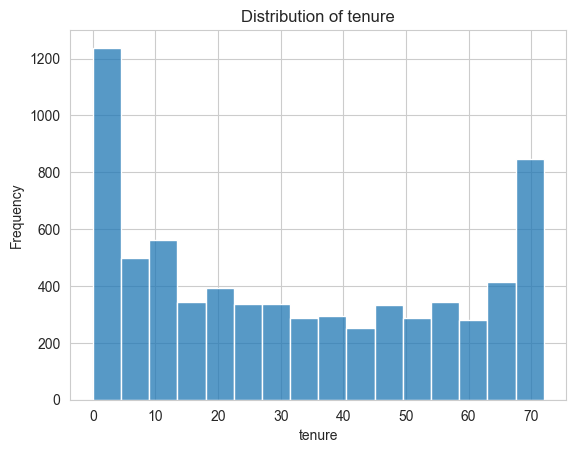

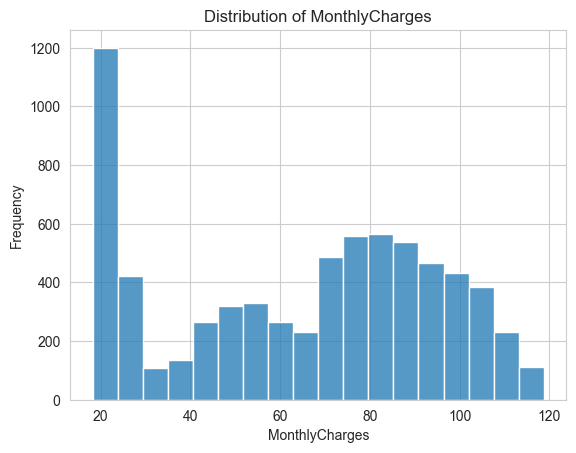

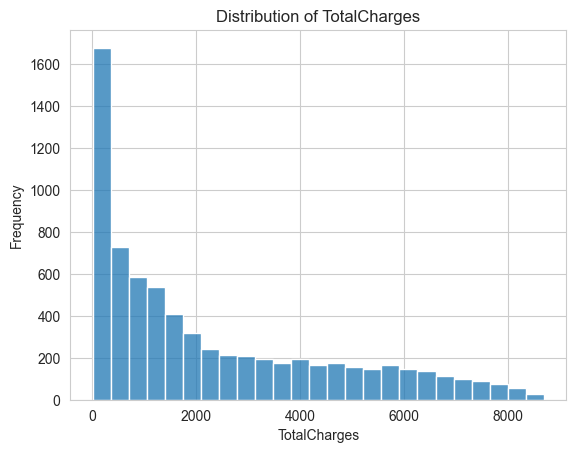

In [31]:
columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
## Histograms for numerical features
for col in columns:
    sns.histplot(df[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [6]:
df["PaymentMethod"].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

<Axes: ylabel='count'>

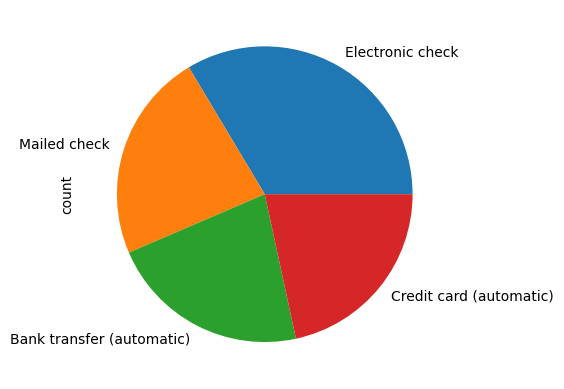

In [7]:
df["PaymentMethod"].value_counts().plot(kind="pie")

In [8]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [9]:
# Show percentage of each class in the target variable
df["Churn"].value_counts(normalize=True)* 100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

In [10]:
sns.set_style("whitegrid")

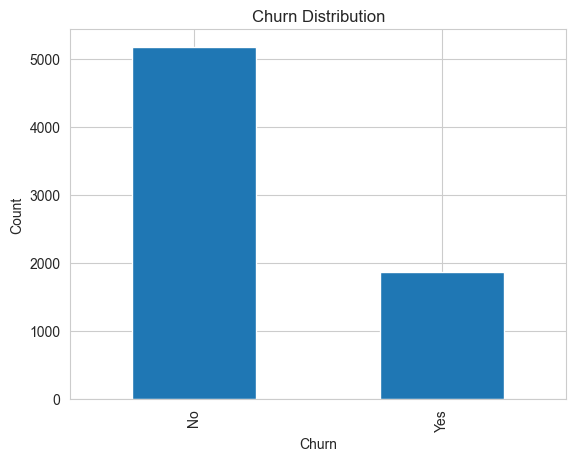

In [11]:
df["Churn"].value_counts().plot(kind='bar')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [12]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
## Total charges to numeric since it is object
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<function matplotlib.pyplot.show(close=None, block=None)>

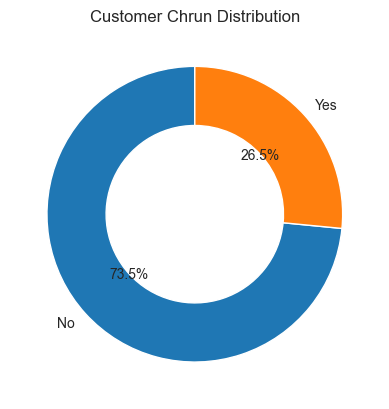

In [17]:
### Plotting a Donught Chat
sizes = df["Churn"].value_counts()
labels = sizes.index
fig, ax = plt.subplots()

ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'width': 0.4}
)

ax.set_title('Customer Chrun Distribution')
plt.show

In [18]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [19]:
df.describe(include="object")

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


The numerical colums doesn't look skwewed except the TotalCharges

# Demographics Charts

In [20]:
df.groupby('Churn')['TotalCharges'].mean()

Churn
No     2555.344141
Yes    1531.796094
Name: TotalCharges, dtype: float64

In [21]:
pd.crosstab(df['gender'], df['Churn'])

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


In [22]:
## Gender and Churn
pd.crosstab(df['gender'], df['Churn'], normalize='index') * 100

Churn,No,Yes
gender,,
Female,73.079128,26.920872
Male,73.839662,26.160338


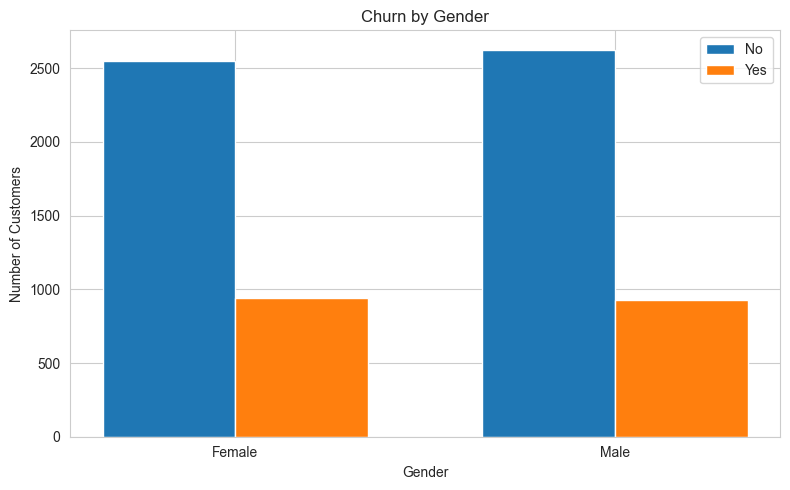

In [23]:
ct = pd.crosstab(df['gender'], df['Churn'])
# Values
labels = ct.index                 # ['Female', 'Male']
churn_no = ct['No'].values
churn_yes = ct['Yes'].values

x = np.arange(len(labels))        # positions
width = 0.35                      # bar width

plt.figure(figsize=(8, 5))

plt.bar(x - width/2, churn_no, width, label='No')
plt.bar(x + width/2, churn_yes, width, label='Yes')

plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title('Churn by Gender')
plt.xticks(x, labels)
plt.legend()

plt.tight_layout()
plt.show()

Gender did not affect the churning

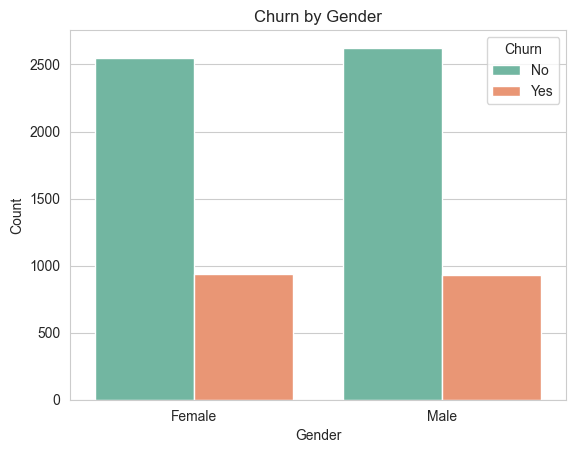

In [24]:
## Using Seaborn to plot countplot
sns.countplot(data=df, x='gender', hue='Churn', palette='Set2')
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

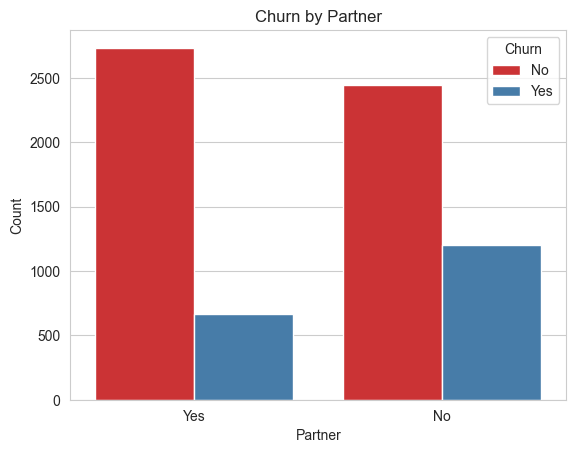

In [25]:
## Using Seaborn to plot countplot
sns.countplot(data=df, x='Partner', hue='Churn', palette='Set1')
plt.title('Churn by Partner')
plt.xlabel('Partner')
plt.ylabel('Count')
plt.show()

💡 Insights: Customers without partners Churn more.

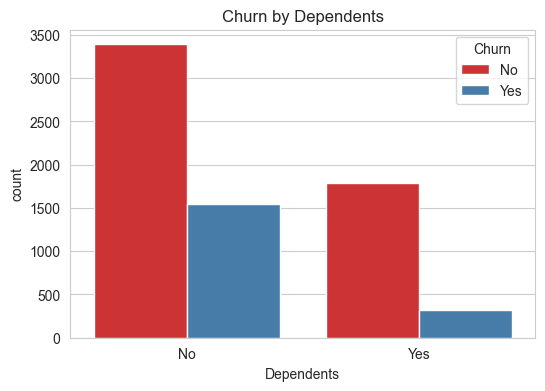

In [26]:
## Using Seaborn to plot countplot
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Dependents', hue='Churn', palette='Set1')
plt.title('Churn by Dependents')
#plt.xlabel('Dependents')
#plt.ylabel('Count')
plt.show()

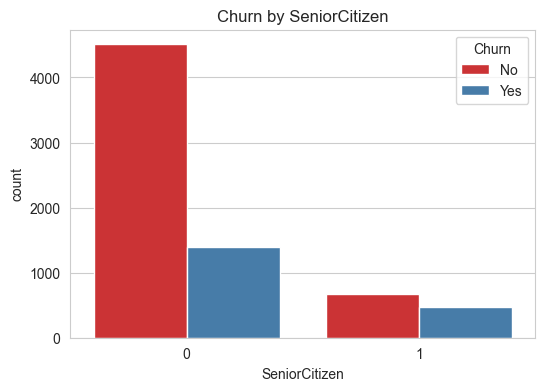

In [27]:

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='SeniorCitizen', hue='Churn', palette='Set1')
plt.title('Churn by SeniorCitizen')
plt.show()

💡 Insight: Those that are not Senior citizens churn more — higher retention focus needed.

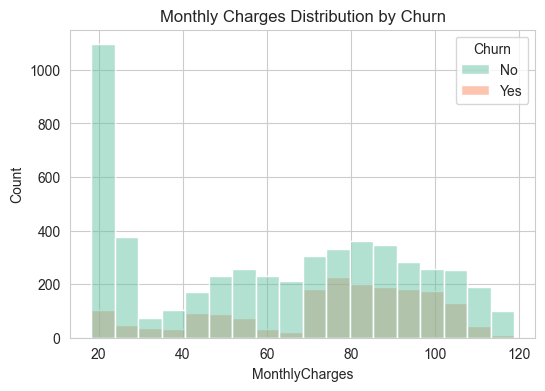

In [28]:
## Using Seaborn to plot countplot on monthlyCharges and TotaolCharges against Churn
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', palette='Set2')
plt.title('Monthly Charges Distribution by Churn')  
plt.show()

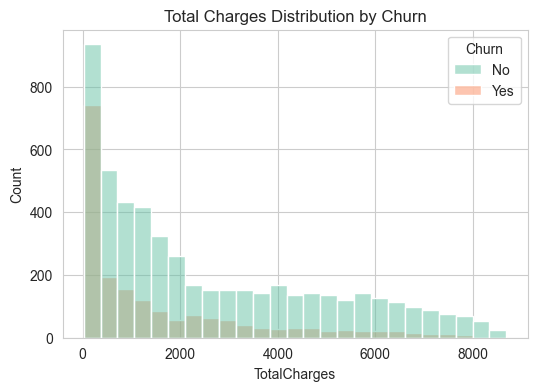

In [29]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='TotalCharges', hue='Churn', palette='Set2')
plt.title('Total Charges Distribution by Churn')  
plt.show()

In [32]:
## A column for numerica of churn

## df['churn_num'] = df['Churn'].map({'Yes': 1, 'No': 0})
df["churn_num"] = df["Churn"].apply(lambda x: 1 if x == "Yes" else 0)
## df['churn_num'] = np.where(df['Churn'] == 'Yes', 1, 0)


In [33]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,churn_num
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


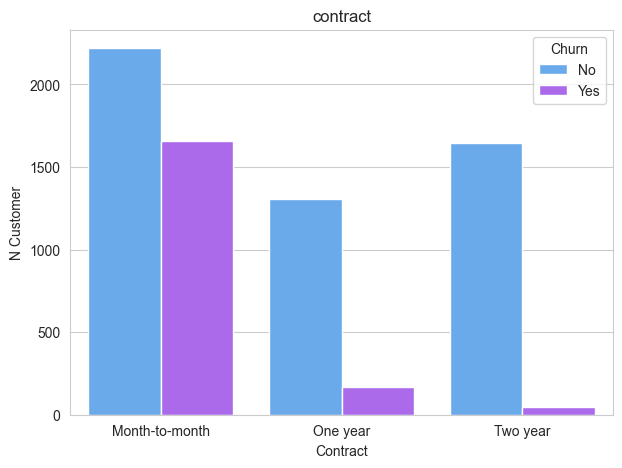

In [34]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="Contract", hue="Churn", palette="cool")
plt.title("contract")
plt.ylabel("N Customer")
plt.show()

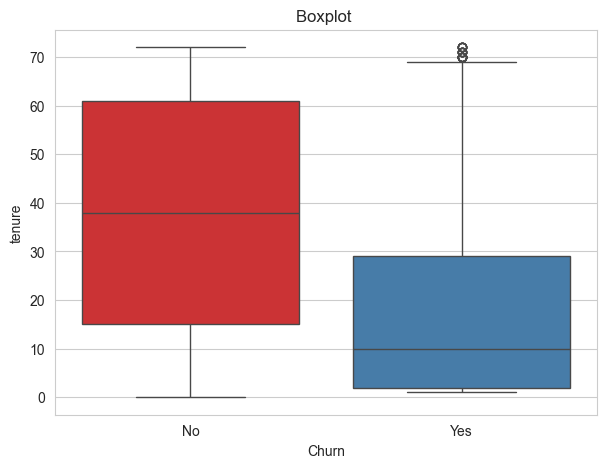

In [35]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="Churn", y="tenure", palette="Set1")
plt.title("Boxplot ")
plt.show()

#  **Do Additional Services Affect Churn?**

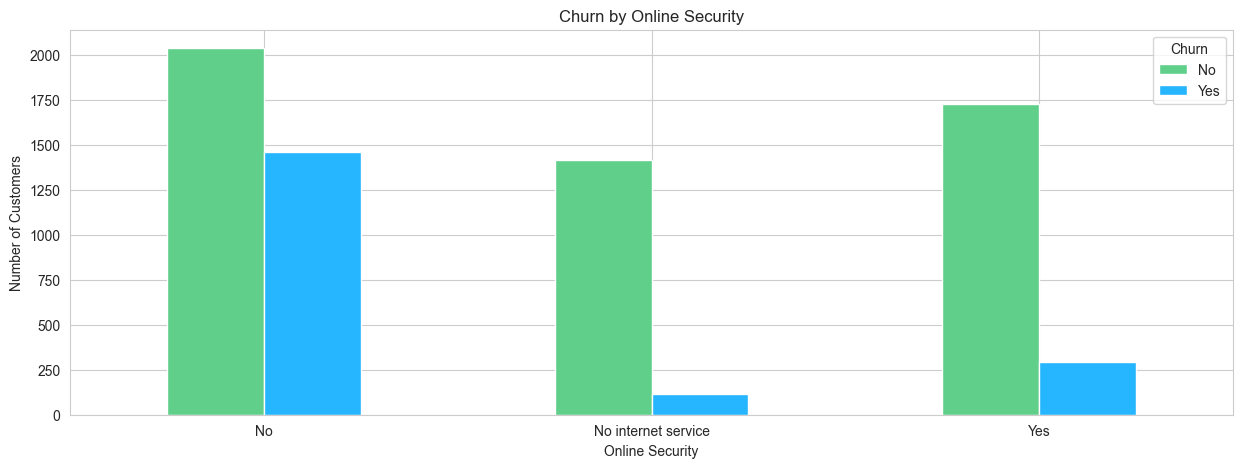

In [36]:
online_churn = pd.crosstab(df['OnlineSecurity'], df['Churn'])

online_churn.plot(
    kind='bar',
    figsize=(15, 5),
    color=['#5fcf89', '#26b5ff']
)

plt.title("Churn by Online Security")
plt.ylabel("Number of Customers")
plt.xlabel("Online Security")
plt.xticks(rotation=360)
plt.show()


* Customers without Online Security or Device Protection are more likely to churn

In [37]:
df.groupby(["StreamingTV","StreamingMovies"])["Churn"].count().reset_index()

,StreamingTV,StreamingMovies,Churn
0,No,No,2018
1,No,Yes,792
2,No internet service,No internet service,1526
3,Yes,No,767
4,Yes,Yes,1940


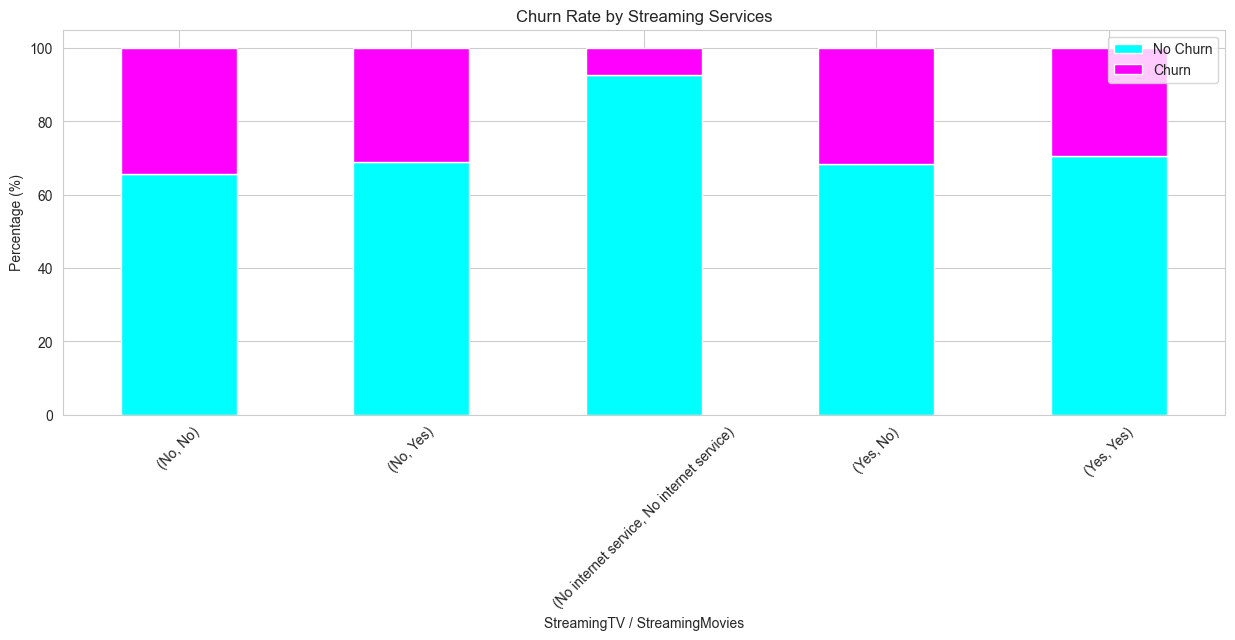

In [38]:
stacked_d = pd.crosstab(
    [df["StreamingTV"], df["StreamingMovies"]],
    df["Churn"],
    normalize="index"
) * 100
stacked_d.plot(
    kind="bar",
    stacked=True,
    figsize=(15,5),
    colormap="cool"
)

plt.title("Churn Rate by Streaming Services")
plt.xlabel("StreamingTV / StreamingMovies")
plt.ylabel("Percentage (%)")
plt.legend(["No Churn", "Churn"])
plt.xticks(rotation=45)
plt.show()

In [39]:
pd.crosstab(df['PaymentMethod'], df['Churn']).sort_values(by='Yes', ascending=False)

Churn,No,Yes
PaymentMethod,,
Electronic check,1294,1071
Mailed check,1304,308
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232


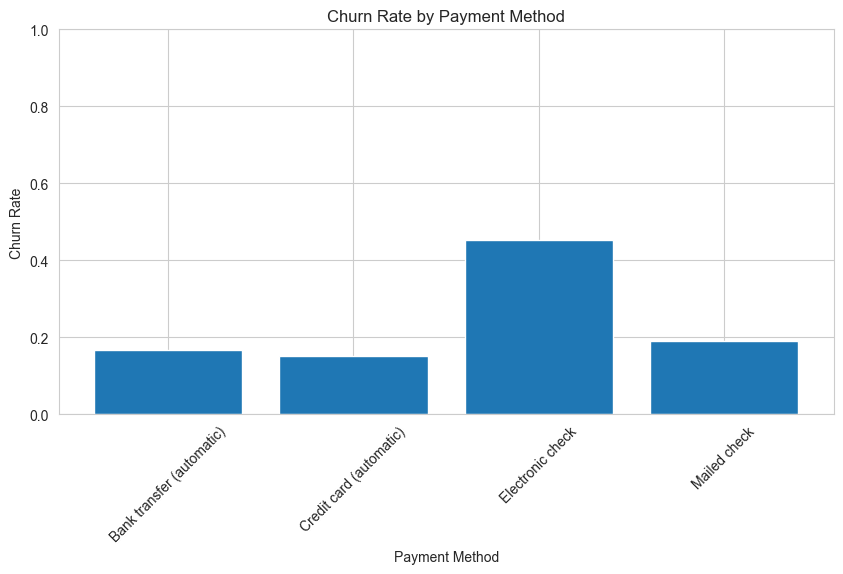

In [40]:
grouped = (
    df.assign(ChurnBinary=df["Churn"].map({"Yes": 1, "No": 0}))
      .groupby("PaymentMethod")["ChurnBinary"]
      .mean()
      .reset_index()
)

plt.figure(figsize=(10, 5))
plt.bar(grouped["PaymentMethod"], grouped["ChurnBinary"])
plt.title("Churn Rate by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Churn Rate")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()


*Customers using electronic checks are more likely to churn, while automated payment methods such as credit cards and bank transfers are associated with lower churn rates*

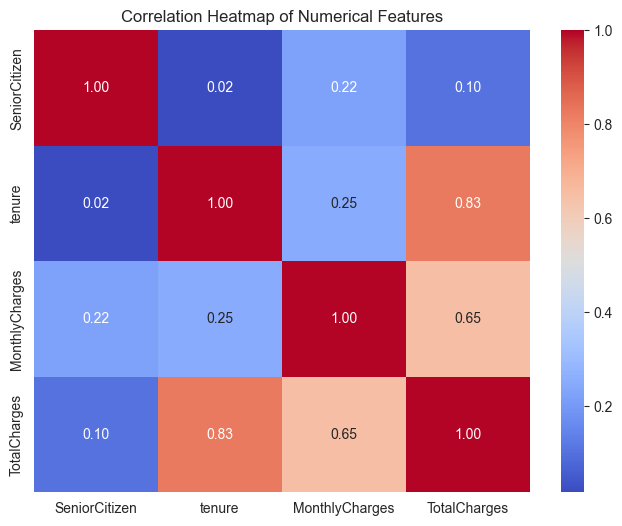

In [41]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
numeric_cols = [col for col in numeric_cols if col != 'churn_num']
df_numeric = df[numeric_cols]
plt.figure(figsize=(8,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

### TotalCharges with Tenure have a good correlation
### TotalCharges with MonthlyCharges have a good correlation


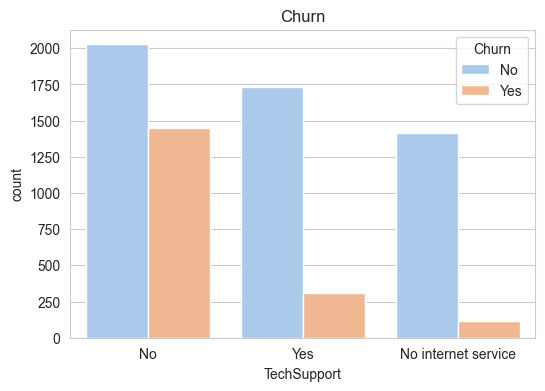

In [42]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="TechSupport", hue="Churn", palette="pastel")
plt.title("Churn")
plt.show()